<a href="https://colab.research.google.com/github/OhSook/BoardShielderNLP/blob/main/lstmLolgall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
pip install konlpy

In [ ]:
pip install tensorflow

In [ ]:
pip install tqdm

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/lolgallData_train.csv', encoding='cp949')
test_data = pd.read_csv('/content/drive/MyDrive/nlp_datasets_test.csv', encoding='cp949')


In [ ]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력


훈련용 리뷰 개수 : 6964


In [ ]:
train_data[:5] # 상위 5개 출력


,title,labels
0,KT는 내년이 진짜 지옥이겠는데,1.0
1,Kt는 남은 애들 데려와라,1.0
2,월즈 2번먹기가 존나 빡세네 진짜,1.0
3,젠지 트로피는 도난당함,1.0
4,작년이나 올해나 롤드컵 때 어떤 기적 같은 걸 본 거 같음....,1.0


In [ ]:
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력
test_data[:5]

테스트용 리뷰 개수 : 3175


,title,labels
0,아니 킅도 lpl 다 만나는데 젠지는 올해 blg가 끝이네,1
1,요즘 진짜 젠마카세 보는 낙으로 산다,1
2,병신들 이제 피넛 없어서 놀이터도 못먹어,0
3,젠지 팀컬러가 왜 도둑임?,1
4,꺄악,1


In [ ]:
# document 열과 label 열의 중복을 제외한 값의 개수
train_data['title'].nunique(), train_data['labels'].nunique()

(6724, 2)

In [ ]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['title'], inplace=True)

In [ ]:
print('총 샘플의 수 :',len(train_data))


총 샘플의 수 : 6724


<Axes: >

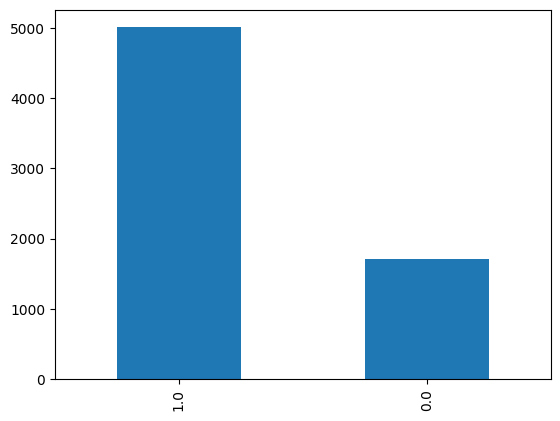

In [ ]:
train_data['labels'].value_counts().plot(kind = 'bar')


In [ ]:
print(train_data.groupby('labels').size().reset_index(name = 'count'))

   labels  count
0     0.0   1717
1     1.0   5006


In [ ]:
print(train_data.isnull().values.any())


True


In [ ]:
print(train_data.isnull().sum())

title     0
labels    1
dtype: int64


In [ ]:
print(len(train_data))


6724


In [ ]:
#알파벳과 공백을 제외하고 모두 제거
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data['title'] = train_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

<ipython-input-41-b2619cd119b6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['title'] = train_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,title,labels
0,는 내년이 진짜 지옥이겠는데,1.0
1,는 남은 애들 데려와라,1.0
2,월즈 번먹기가 존나 빡세네 진짜,1.0
3,젠지 트로피는 도난당함,1.0
4,작년이나 올해나 롤드컵 때 어떤 기적 같은 걸 본 거 같음,1.0


In [ ]:
train_data['title'] = train_data['title'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['title'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

title     9
labels    1
dtype: int64


<ipython-input-42-ff19fde5b2ed>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['title'] = train_data['title'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


In [ ]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

6714


In [ ]:
test_data.drop_duplicates(subset = ['title'], inplace=True) # title 열에서 중복인 내용이 있다면 중복 제거
test_data['title'] = test_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['title'] = test_data['title'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['title'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 3052


<ipython-input-44-8bbc6a3d92be>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['title'] = test_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
<ipython-input-44-8bbc6a3d92be>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['title'] = test_data['title'].str.replace('^ +', "") # 공백은 empty 값으로 변경


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


In [ ]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)


['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
X_train = []
for sentence in tqdm(train_data['title']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 6714/6714 [00:12<00:00, 531.70it/s]


In [ ]:
print(X_train[3:6])


[['젠', '지', '트로피', '도난', '당하다'], ['작년', '이나', '올해', '나', '롤드컵', '때', '어떻다', '기적', '같다', '걸', '보다', '거', '같다'], ['사실', '순수', '젠', '지', '팬', '제일', '불쌍하다']]


In [ ]:
X_test = []
for sentence in tqdm(test_data['title']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)


100%|██████████| 3052/3052 [00:05<00:00, 556.28it/s]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [ ]:
print(tokenizer.word_index)


{'젠': 1, '지': 2, '아니다': 3, '근데': 4, '쵸': 5, '보다': 6, '비다': 7, '팀': 8, '티원': 9, '임': 10, 'ㅋㅋ': 11, '즈': 12, '같다': 13, '없다': 14, '가다': 15, '진짜': 16, '페이커': 17, '있다': 18, '월': 19, '우승': 20, '되다': 21, '안': 22, '왜': 23, '다': 24, '한화': 25, '존나': 26, '거': 27, '아': 28, '을': 29, '못': 30, '개다': 31, 'ㅋㅋㅋ': 32, '만': 33, '내년': 34, '네': 35, '면': 36, 'ㄹㅇ': 37, '베릴': 38, '새끼': 39, '로': 40, '삼성': 41, '고': 42, '에서': 43, '제': 44, '오다': 45, '롤': 46, '년': 47, '이다': 48, '트로피': 49, '맞다': 50, '그냥': 51, '인데': 52, '선수': 53, '피넛': 54, '급': 55, '젠첩': 56, '함': 57, '제우스': 58, '언': 59, '칼': 60, '게': 61, '캐다': 62, '않다': 63, '들다': 64, '라스': 65, '지는': 66, 'ㅋㅋㅋㅋ': 67, '냐': 68, '기인': 69, '이유': 70, '개': 71, '먹다': 72, 'ㅇㅇ': 73, '원': 74, '알다': 75, '광동': 76, '더': 77, '지금': 78, '뭐': 79, '재계약': 80, '구': 81, '리헨즈': 82, '도란': 83, '오': 84, '나': 85, '한테': 86, '지다': 87, '별': 88, '때': 89, '전': 90, '랑': 91, '늘다': 92, '우승하다': 93, '애': 94, '올해': 95, '롤드컵': 96, '좋다': 97, '미드': 98, '담': 99, '리그': 100, '너': 101, '기': 102, 'ㅋㅋㅋㅋㅋ': 103, '크

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 5891
등장 빈도가 2번 이하인 희귀 단어의 수: 3771
단어 집합에서 희귀 단어의 비율: 64.01290103547784
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.327838050790957


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2121


In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
print(X_train[:3])


[[92, 34, 16], [92, 241, 94, 487], [19, 12, 325, 1661, 26, 1381, 35, 16]]


In [ ]:
y_train = np.array(train_data['labels'])
y_test = np.array(test_data['labels'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]


In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))


6704
6704


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


제목의 최대 길이 : 18
제목의 평균 길이 : 6.694510739856802


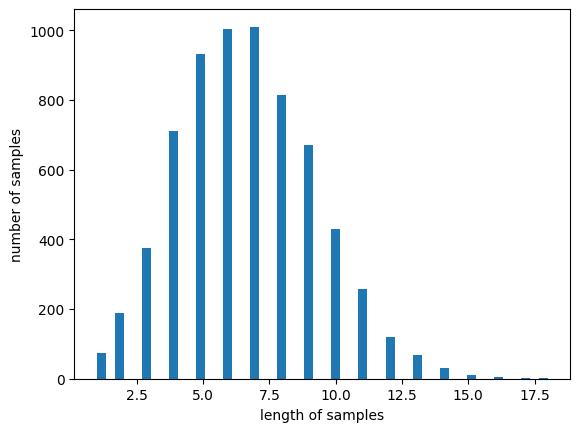

In [ ]:
print('제목의 최대 길이 :',max(len(review) for review in X_train))
print('제목의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))


In [ ]:
max_len = 13
below_threshold_len(max_len, X_train)


전체 샘플 중 길이가 13 이하인 샘플의 비율: 99.2989260143198


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('/content/drive/MyDrive/lstmLol/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)


Epoch 1/15
81/84 [===========================>..] - ETA: 0s - loss: 0.5580 - acc: 0.7461
Epoch 1: val_acc improved from -inf to 0.74348, saving model to /content/drive/MyDrive/lstmLol/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 [==============================] - 15s 72ms/step - loss: 0.5566 - acc: 0.7470 - val_loss: 0.5285 - val_acc: 0.7435
Epoch 2/15
84/84 [==============================] - ETA: 0s - loss: 0.4241 - acc: 0.8188
Epoch 2: val_acc improved from 0.74348 to 0.81954, saving model to /content/drive/MyDrive/lstmLol/best_model.h5
84/84 [==============================] - 2s 28ms/step - loss: 0.4241 - acc: 0.8188 - val_loss: 0.4668 - val_acc: 0.8195
Epoch 3/15
84/84 [==============================] - ETA: 0s - loss: 0.3276 - acc: 0.8786
Epoch 3: val_acc improved from 0.81954 to 0.85086, saving model to /content/drive/MyDrive/lstmLol/best_model.h5
84/84 [==============================] - 2s 22ms/step - loss: 0.3276 - acc: 0.8786 - val_loss: 0.3848 - val_acc: 0.8509
Epoch 4/15
84/84 [==============================] - ETA: 0s - loss: 0.2829 - acc: 0.8926
Epoch 4: val_acc did not improve from 0.85086
84/84 [==============================] - 1s 11ms/step - loss: 0.2829 - acc: 0.8926 - val_loss: 0.4101 

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/lstmLol/best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))


96/96 [==============================] - 1s 3ms/step - loss: 0.4801 - acc: 0.8195

 테스트 정확도: 0.8195


In [ ]:
with open('tokenizer.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 작성 가능한 제목입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 블라인드 처리될 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
 while True:
    title_write = input('제목 : ')
    if title_write == '종료':
        print('Board Shielder가 종료됩니다.')
        break
    sentiment_predict(title_write)

제목 : 팀운 좆같네
1/1 [==============================] - 3s 3s/step
90.34% 확률로 블라인드 처리될 리뷰입니다.

제목 : 오늘 팀운 개좋네
1/1 [==============================] - 0s 20ms/step
75.26% 확률로 작성 가능한 제목입니다.

제목 : 난 박쥐라고 까는 새끼들이 젤 정신병자들같음ㅋㅋㅋ
1/1 [==============================] - 0s 26ms/step
98.88% 확률로 블라인드 처리될 리뷰입니다.

제목 : 종료
Board Shielder가 종료됩니다.
